In [1]:
 # pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import os
import string
import re
import glob
import urllib.parse
import nltk
# nltk.download()
from pandas import DataFrame
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm

In [3]:
os.chdir("C:\\Green_Bond\\Text" )

In [4]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [5]:
data = os.getcwd()
files = os.listdir(data)
stopword_set = nltk.corpus.stopwords.words('english')

In [6]:
# print (os.getcwd(C:\Green_Bond\Text))

In [7]:
# define different data sources and data types
sdg_keywords={1:['poverty', 'income distribution', 'wealth distribution','socio economic', 'homeless', 'low income','affordab', 'disparity', 
                 'welfare', 'social safety', 'developing country', 'vulnerability', 'precarity','pro-poor'],
              2:['agricultur', 'nutrition', 'food security', 'food insecurity', 'food system', 'child hunger', 'food justice', 'food scarcity',
                 'food sovereignty', 'food culture', 'culinary', 'agro', 'permaculture', 'indigenous crops', 'regenerative agriculture', 
                 'urban agriculture', 'organic food', 'biodynamic', 'food literacy', 'food education', 'benefit sharing', 'access and benefit sharing (ABS)',
                 'malnutrition', 'end hunger', 'food price', 'zero hunger'],
              3:['well being','mental health', 'public health', 'global health', 'health care', 'health issues', 'mental wellness', 'disabilit',
                 'sexual education', 'mindfulness', 'holism', 'illness', 'health education', 'communicable disease', 'health determinants', 'vaccine', 
                 'substance abuse', 'maternal mortality', 'family planning', 'hazardous chemicals', 'pollution', 'health equity', 'neonatal mortality',
                 'infant mortality', 'child health', 'road traffic accidents', 'reproductive health', 'epidemics', 'universal health coverage'],
             4:['equitable', 'pedagogy', 'knowledge', 'worldview', 'learning', 'traditional knowledge', 'land-based knowledge', 'place-based knowledge',
                'decolonial', 'anticolonial', 'settler', 'equitable', 'equity', 'anti-racism', 'racism', 'anti-oppression', 'oppression', 'anti-discriminatory',
                'early childhood development', 'peace', 'citizen', 'sustainability teaching', 'sustainability education', 'universal literacy',
                'basic literacy', 'universal numeracy', 'environmental education', 'education for sustainable development', 'ecojustice education',
                'place-based education', 'humane education', 'land-based learning', 'nature-based education', 'climate change education',
                'vocational', 'technical learning', 'free education', 'accessible education', 'primary education', 'secondary education', 
                'tertiary education'],
             5:['gender', 'women', 'girl', 'queer', 'female', 'feminis', 'non binary', 'sexes', 'LGBTQ', 'patriarchy', 'transgender', 'two-spirit', 
                'gender equality', 'violence against women', 'trafficking', 'forced marriage'],
             6:['water', 'sanita', 'contamination', 'arid', 'drought', 'hygien', 'sewage','water scarcity', 'remediation', 'untreated wastewater',
                'water harvesting', 'desalination', 'water efficiency','groundwater depletion', 'desertification', 'water filtration', 'latrines',
                'open defecation', 'hydrological cycle', 'water and energy nexus', 'stormwater management', 'low impact development', 'green infrastructure',
                'living infrastructure', 'water education'],
             7:['energy', 'renewabl', 'wind', 'solar', 'geothermal','hydroelectric', 'fuel efficient', 'carbon capture', 'emission', 'greenhouse','biofuel',
                'energy sovereignty', 'energy security', 'energy education'],
             8:['employment', 'economic growth', 'sustainable development', 'labour', 'worker', 'wage', 'economic empowerment', 'entrepreneur', 
                'small- and medium-sized enterprises', 'SMEs', 'sustainable tourism', 'youth employment', 'green job', 'economic recovery',
                'green growth', 'sustainable growth'],
             9:['infrastructure', 'buildings', 'capital', 'invest', 'internet', 'globalis', 'Industrialization', 'value chain', 
                'affordable credit', 'industrial diversification'],
             10:['trade', 'inequality', 'financial market', 'taxation', 'equit', 'equalit', 'humanitarian', 'minorit', 'refugee', 'BIPOC',
                 'of colour','indigenous', 'reconciliation', 'truth and reconciliation', 'underserved', 'privileged', 'affordab', 'equal access',
                 'marginalised', 'impoverished', 'vulnerable population', 'social safety', 'social security', 'government program', 'disparity',
                 'income', 'Gini', 'anti-oppressive', 'anti-racist', 'anti-discriminatory', 'decolonization'],
             11:['cities', 'urban', 'resilien', 'rural', 'sustainable development', 'public transport', 'metro', 'housing green infrastructure',
                 'low impact development', 'climate change adaptation', 'climate change mitigation', 'green buildings', 'affordable housing', 'walkab',
                 'transit', 'civic spaces', 'open spaces', 'accessib', 'indigenous placemaking', 'indigenous placekeeping'],
             12:['consum', 'production', 'waste', 'natural resource','recycl', 'industrial ecology', 'sustainable design',
                 'supply chain', 'outsourc', 'offshor', 'reuse','decarbonis', 'carbon tax', 'carbon pricing', 'food waste', 'public procurement',
                 'fossil fuel subsidies'],
             13:['climate', 'greenhouse gas', 'global warming', 'weather', 'environmental', 'planet', 'vegan', 'vegetarian', 'anthropogenic', 'fossil fuel', 
                 'emissions', 'carbon dioxide', 'CO2', 'carbon neutral', 'net zero', 'methane', 'sea level', 'climate change mitigation',
                 'climate change adaptation', 'climate impacts', 'climate scenarios', 'climate solutions', 'climate justice', 'global climate models',
                 'carbon capture', 'carbon sequestration', 'low carbon', 'resilience', 'anthropocene', 'climate positive', 'offsets', 'carbon trading', 
                 'carbon markets', 'UNFCCC', 'climate finance', 'loss and damage', 'Paris'],
             14:['ocean', 'marine', 'pollut', 'conserv', 'fish', 'natural habitat', 'species', 'animal', 'biodivers', 'coral', 'maritime', 
                 'ocean literacy ecosystem', 'overfish', 'fish stocks', 'ocean', 'sustainable use', 'traditional use'],
             15:['forest', 'biodivers', 'ecolog', 'pollut', 'conserv', 'land use', 'natural habitat', 'species', 'animal', 'regeneration', 'resilience', 
                 'sustainable and traditional use', 'land ecological restoration', 'forest conservation', 'carbon sequestration', 'carbon capture', 'soil',
                 'erosion', 'habitat loss', 'endangered species ecosystem', 'deforestation', 'reforestation', 'wildlife', 'flora and fauna', 
                 'benefit sharing'],
             16:['institut', 'governance', 'peace', 'social justice', 'injustice', 'criminal justice', 'human rights', 'democratic rights', 'voter rights', 
                 'legal system', 'social change', 'corrupt', 'nationalism', 'democra', 'authoritarian', 'indigenous', 'judic', 'ecojustice', 
                 'indigenous rights', 'self-determination sovereignty violence', 'exploitation', 'trafficking', 'torture', 'rule of law', 'illicit', 
                 'organized crime', 'bribe', 'terroris', 'prior and informed consent', 'access and benefit sharing', 
                 'UNDRIP (United Nations Declaration on Rights of Indigenous Peoples)', 'indigenous rights'],
             17:['Capacity building','Civil society partnerships','Communication technologies','Debt sustainability','Development assistance',
                 'Disaggregated data','Doha Development Agenda','Entrepreneurship','Environmentally sound technologies','Foreign direct investments',
                 'Fostering innovation','Free trade','Fundamental principles of official statistics','Global partnership','Global stability',
                 'International aid','International cooperation','International support','Knowledge sharing','Multi-stakeholder partnerships',
                 'Poverty eradication','Public-private partnerships','Science cooperation agreements','Technology cooperation agreements',
                 'Technology transfer','Weighted tariff average','Women entrepreneurs','World Trade Organization']}                                        

In [8]:
dic = ''
df_sdg_keywords = pd.DataFrame()
df_sdg_keywords = pd.concat([df_sdg_keywords, pd.DataFrame([sdg_keywords])], ignore_index=True)
dic =  df_sdg_keywords[1] +\
        df_sdg_keywords[2] +\
        df_sdg_keywords[3] +\
        df_sdg_keywords[4] +\
        df_sdg_keywords[5] +\
        df_sdg_keywords[6] +\
        df_sdg_keywords[7] +\
        df_sdg_keywords[8] +\
        df_sdg_keywords[9] +\
        df_sdg_keywords[10] +\
        df_sdg_keywords[11] +\
        df_sdg_keywords[12] +\
        df_sdg_keywords[13] +\
        df_sdg_keywords[14] +\
        df_sdg_keywords[15] +\
        df_sdg_keywords[16] +\
        df_sdg_keywords[17] 
# print(dic.to_list())

In [9]:
# to extract sentences containg the word "data"
search_keywords = ['sdg','data','dataset','Green', 'Social']
def sentences_containing_data(whole_paper):
    #print(sentences)
    sentences = whole_paper.split(".")
      
    sources = []
    sources_string = ''
    for sentence in sentences:
        for word in search_keywords:
            if word in sentence and word not in sources:
                sources.append(sentence)
        sources_string = ','.join(sources)
            # print(sources_string)
    #print(sources)
    return sources


In [10]:
# identify all the defined data sources from a sentence

def categorise(sentence):
    sources = []
    sources_string = ''
    for series_name, series in dic.items():
        # print("sent :", sent)
        for word in series:
            if word in sentence and word not in sources:
                sources.append(word)
                # print("Word :", word)
            # else:
            #     sources.append("NaNa")
        sources_string = ','.join(sources)
                # print(sources_string)
    #print(sources)
    return sources_string

In [11]:

data = []

whole_paper = ''
# try:
for filename in tqdm(os.listdir(".")):
    with open(filename, encoding="utf-8") as f:
        #print("f ", f)
        file =  " ".join(line.strip() for line in f)
        data.append([file, filename])
        whole_paper = whole_paper + ' ' + file
    key_sentences = sentences_containing_data(whole_paper)
    data_table = pd.DataFrame({"Sentence": key_sentences})
    data_types = data_table['Sentence'].apply(categorise)
    data_table['Sdg_keywords'] = data_types
    #print("key_sentences: ",key_sentences)
    #key_Sdg_keywords = categorise(key_sentences)
    #print("key_Sdg_keywords ",key_Sdg_keywords)
    # create a table to store the sentences containg the word "data"
    df = pd.DataFrame(data, columns=['Text', "Name"])

    
   
 

    Sentence_main = ''
    for row in data_table.itertuples(index=True, name='Pandas'): 
        Sentence_main = Sentence_main + row.Sentence

    df['Sentence'] = Sentence_main
    
    data_table = data_table.query('Sdg_keywords != ""')
    Sdg_main = ''
    for row in data_table.itertuples(index=True, name='Pandas'): 
        Sdg_main = Sdg_main + row.Sentence

    df['Sdg_Sentence'] = Sdg_main
    #### sdg sentence
   
       
    df['Sentence_length'] = df['Sentence'].apply(lambda x: len(x))
    df['Tex_length'] = df['Text'].apply(lambda x: len(x))
    df['Sdg_Sentence_length'] = df['Sdg_Sentence'].apply(lambda x: len(x))
    df.reset_index(inplace=True,drop=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.35it/s]


In [12]:
 data_table

,Sentence,Sdg_keywords
7,The Project Evaluation and Selection criteri...,invest
8,The Project Evaluation and Selection criteri...,invest
9,Eligible Assets must fall within one or seve...,"water,employment"
10,Eligible Assets must fall within one or seve...,"water,employment"
11,TD's business finance segments will assess p...,invest
12,TD's business finance segments will assess p...,invest
15,5 Page 6 of 6 1 SCHEDULE 1: CATE...,"water,employment"
16,5 Page 6 of 6 1 SCHEDULE 1: CATE...,"water,employment"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text                 1 non-null      object
 1   Name                 1 non-null      object
 2   Sentence             1 non-null      object
 3   Sdg_Sentence         1 non-null      object
 4   Sentence_length      1 non-null      int64 
 5   Tex_length           1 non-null      int64 
 6   Sdg_Sentence_length  1 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 188.0+ bytes


In [14]:
####Data cleaning & data preprocessing


In [15]:
combined_df = df.copy(deep=True)
combined_df.reset_index(inplace=True,drop=True)
# combined_basic_df = combined_df.copy(deep=True)

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text                 1 non-null      object
 1   Name                 1 non-null      object
 2   Sentence             1 non-null      object
 3   Sdg_Sentence         1 non-null      object
 4   Sentence_length      1 non-null      int64 
 5   Tex_length           1 non-null      int64 
 6   Sdg_Sentence_length  1 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 188.0+ bytes


In [17]:
combined_df

,Text,Name,Sentence,Sdg_Sentence,Sentence_length,Tex_length,Sdg_Sentence_length
0,TORONTO-DOMINION BANK GROUP SUSTAINABLE BO...,Canada_Sustainability Bonds Issuers_TD_Externa...,The purpose of the Framework is to set forth ...,The Project Evaluation and Selection criteri...,6966,13717,4498


In [18]:
# combined_df['Name'] = combined_df['Name'].str.replace(f'[{string.punctuation}]',"",regex=True)
# combined_df['Name'] = combined_df['Name'].str.replace(f'20of|20|[{string.punctuation}]'," ",regex=True)

In [19]:
# combined_df['Name'] = combined_df['Name'].str.replace(f'20of|20|[{string.punctuation}]'," ",regex=True)

In [20]:
# combined_df

In [21]:
combined_df['Name'].str.split('_', expand=True)

,0,1,2,3
0,Canada,Sustainability Bonds Issuers,TD,External%20Review%20Report.pdf.txt


In [22]:
combined_df[['Country', 'BondType','Company','Ext']] = combined_df['Name'].str.split('_', expand=True)
combined_df[['Country']] = combined_df['Country'].str.split('external', expand=True)

In [23]:
combined_df['Ext'] = combined_df['Ext'].str.replace(f'txt|pdf|20of|20|[{string.punctuation}]'," ",regex=True)
combined_df['Company'] = combined_df['Company'].str.replace(f'txt|pdf|20of|20|[{string.punctuation}]'," ",regex=True)
combined_df['BondType'] = combined_df['BondType'].str.replace(f' Issuers'," ",regex=True)

In [24]:
# combined_df['Name'].str.split('_', expand=True)

In [25]:
# combined_df = pd.DataFrame(combined_df['Name'].str.split('_',expand=True).rename({0: 'Country', 1: 'BondType', 2:'Company', 3:'Ext'} , axis=1))


In [26]:
combined_df.info()                               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text                 1 non-null      object
 1   Name                 1 non-null      object
 2   Sentence             1 non-null      object
 3   Sdg_Sentence         1 non-null      object
 4   Sentence_length      1 non-null      int64 
 5   Tex_length           1 non-null      int64 
 6   Sdg_Sentence_length  1 non-null      int64 
 7   Country              1 non-null      object
 8   BondType             1 non-null      object
 9   Company              1 non-null      object
 10  Ext                  1 non-null      object
dtypes: int64(3), object(8)
memory usage: 220.0+ bytes


In [27]:
combined_df.head(3)

,Text,Name,Sentence,Sdg_Sentence,Sentence_length,Tex_length,Sdg_Sentence_length,Country,BondType,Company,Ext
0,TORONTO-DOMINION BANK GROUP SUSTAINABLE BO...,Canada_Sustainability Bonds Issuers_TD_Externa...,The purpose of the Framework is to set forth ...,The Project Evaluation and Selection criteri...,6966,13717,4498,Canada,Sustainability Bonds,TD,External Review Report


In [28]:
combined_df.drop(['Text', 'Tex_length'], axis=1, inplace=True)

In [29]:
combined_df['Name'] = combined_df['Name'].str.replace(f'[{string.punctuation}]'," ",regex=True)
combined_df['Name'] = combined_df['Name'].str.replace(f'20of|20|[{string.punctuation}]'," ",regex=True)

In [30]:
# combined_df.drop(['4', '5'], axis=1, inplace=True)

In [31]:
combined_df_P1 =  combined_df.copy(deep=True)

combined_df_P1.reset_index(inplace=True,drop=True)
combined_df_P1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 1 non-null      object
 1   Sentence             1 non-null      object
 2   Sdg_Sentence         1 non-null      object
 3   Sentence_length      1 non-null      int64 
 4   Sdg_Sentence_length  1 non-null      int64 
 5   Country              1 non-null      object
 6   BondType             1 non-null      object
 7   Company              1 non-null      object
 8   Ext                  1 non-null      object
dtypes: int64(2), object(7)
memory usage: 204.0+ bytes


In [32]:
##NLP Cleaning 

In [33]:
def clean_column(column_name):
   
    lemmatizer = nltk.stem.WordNetLemmatizer()    
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stemmer = PorterStemmer()
    
    
    word_list=[stemmer.stem(lemmatizer.lemmatize(words.lower())) for words in set(w_tokenizer.tokenize(column_name)) 
               if words.isalpha()
               if words not in string.punctuation
               if words.lower() not in stopword_set]
               
    
    return word_list

In [34]:
def preprocessing_data(df,column):
    
    df[column + "_clean"] = df[column].apply(clean_column)       
    # dataframes.append(df)
        
    return df

In [35]:
#codes for entire data:

combined_df_P2=preprocessing_data(combined_df_P1, 'Sentence')
combined_df_P2=preprocessing_data(combined_df_P1, 'Sdg_Sentence')
combined_df_P2=preprocessing_data(combined_df_P1, 'Name')
combined_df_P2.reset_index(inplace=True,drop=True)


In [36]:
combined_df_P2['Sentence']

0     The purpose of the Framework is to set forth ...
Name: Sentence, dtype: object

In [37]:
combined_df_P2['Sdg_Sentence']

0     The Project Evaluation and  Selection criteri...
Name: Sdg_Sentence, dtype: object

<Axes: >

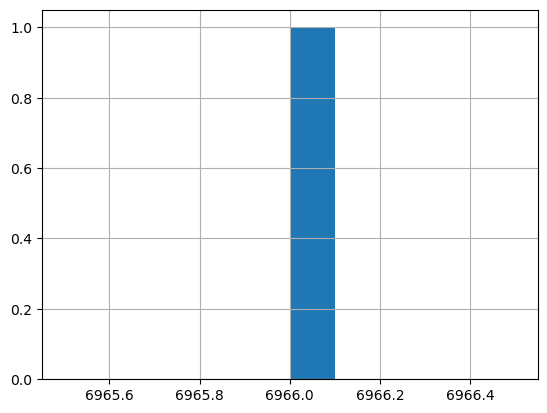

In [38]:
combined_df_P2['Sentence'].str.len().hist()

<Axes: >

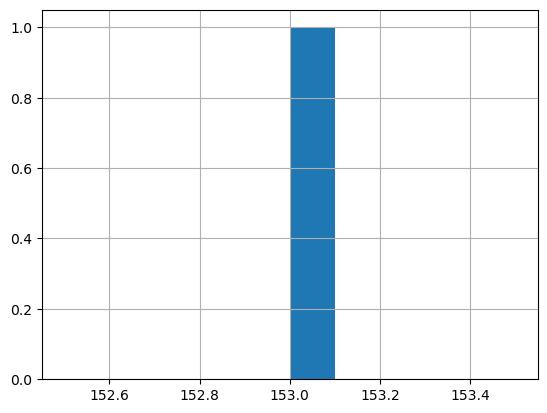

In [39]:
combined_df_P2['Sentence_clean'].str.len().hist()

<Axes: >

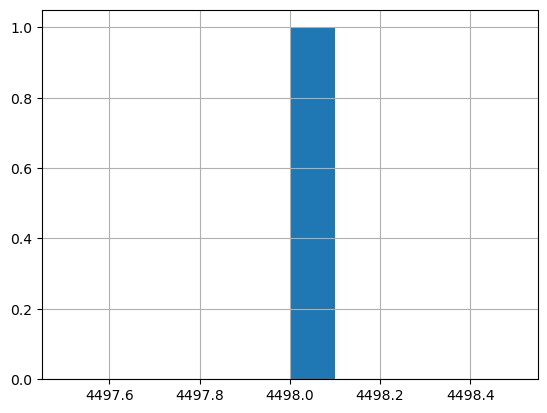

In [40]:
combined_df_P2['Sdg_Sentence'].str.len().hist()

<Axes: >

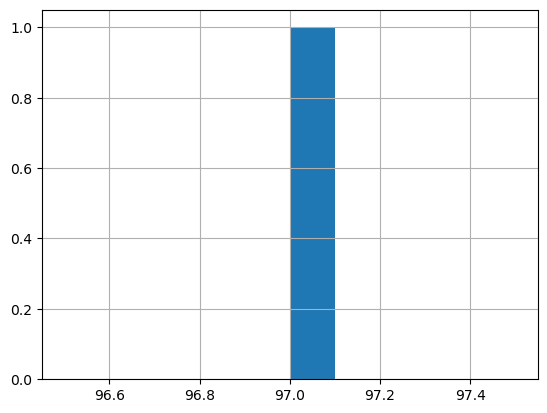

In [41]:
combined_df_P2['Sdg_Sentence_clean'].str.len().hist()

<Axes: xlabel='count', ylabel='Country'>

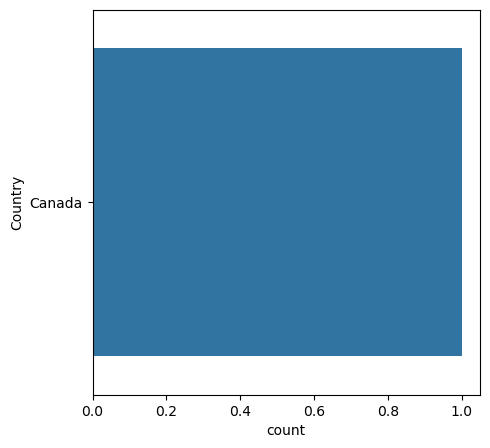

In [42]:
#cited: 
#https://www.kaggle.com/code/shiblinomani/fake-news-detection-tokenization-lstm
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot(y="Country", data = combined_df_P2)

In [43]:
import nltk
def words(col_name):
    word_list=[]
    for x in list(col_name):
        for w in x:
            word_list.append(w)
    return word_list

combined_df_P2_words = words(combined_df_P2["Sentence_clean"])
combined_df_P3_words = words(combined_df_P2["Sdg_Sentence_clean"])


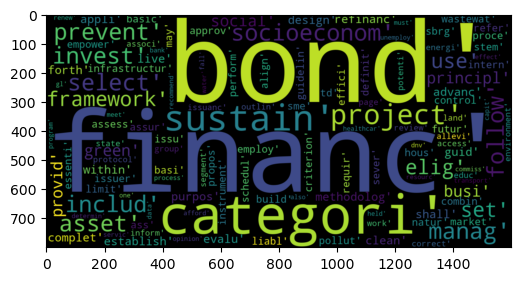

In [44]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(6,6))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stopword_set).generate(str(combined_df_P2_words))
plt.imshow(wc, interpolation='bilinear')

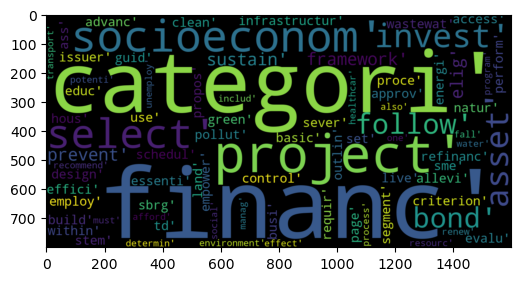

In [45]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(6,6))
wc = WordCloud(max_words =2000, width = 1600, height =800, stopwords = stopword_set).generate(str(combined_df_P3_words))
plt.imshow(wc, interpolation='bilinear')